In [29]:
from google.colab import files
uploaded = files.upload()


Saving data-set-paper-estocastica-1.csv to data-set-paper-estocastica-1 (2).csv


In [30]:
!pip install arch

In [31]:
#Limpieza y arreglo del data set
import pandas as pd

# Cargar el archivo proporcionado
df = pd.read_csv('data-set-paper-estocastica-1.csv')

# Mostrar las primeras filas para entender la estructura de los datos
df.head()


,Unnamed: 0,2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,2020,Unnamed: 6,Unnamed: 7,Unnamed: 8,2021,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,2023,Unnamed: 18,Unnamed: 19,Unnamed: 20,2024,Unnamed: 22,Unnamed: 23
0,NaN,I,II,III,IV,I,II,III,IV,I,...,II,III,IV,I,II,III,IV,I,II,III
1,Gasto de Consumo final Hogares (2),4.5,-0.1,-4.2,-0.8,2.2,-17.4,4.9,4.5,8.4,...,-5.9,7.2,-1.1,4.0,1.1,-5.5,4.3,-2.9,2.6,-0.90
2,Gasto de Consumo final Gobierno General,-1.3,-0.7,-1.1,-0.5,-0.9,-2.6,0.0,-0.6,0.7,...,0.5,0.4,1.5,0.8,-0.1,-0.7,-0.2,-0.6,0.0,-0.28
3,Formación Bruta de Capital Fijo (FBKF),-10.1,4.4,-2.6,-3.5,-7.6,-18.2,0.8,3.0,11.2,...,-0.6,-2.0,-3.5,1.1,3.7,0.3,0.2,-9.5,1.3,2.1
4,Exportaciones (FOB),-3.1,8.8,1.3,2.8,-0.2,-25.9,26.0,7.5,-5.9,...,7.4,-2.6,3.3,-6.3,4.4,5.5,-5.7,3.6,-1.4,-1.5


In [32]:
# Eliminar las filas que no contienen datos útiles (filas de encabezado no relevantes)
df_cleaned = df.dropna(how="all", axis=0)

# Renombrar las columnas
df_cleaned.columns = ['Variable', '2019_Q1', '2019_Q2', '2019_Q3', '2019_Q4',
                      '2020_Q1', '2020_Q2', '2020_Q3', '2020_Q4',
                      '2021_Q1', '2021_Q2', '2021_Q3', '2021_Q4',
                      '2022_Q1', '2022_Q2', '2022_Q3', '2022_Q4',
                      '2023_Q1', '2023_Q2', '2023_Q3', '2023_Q4',
                      '2024_Q1', '2024_Q2', '2024_Q3']

# Limpiar los datos de las variables de la primera columna (en este caso "Variable")
df_cleaned['Variable'] = df_cleaned['Variable'].str.strip()

# Eliminar cualquier fila donde la variable sea nula o innecesaria
df_cleaned = df_cleaned[df_cleaned['Variable'].notna()]

# Mostrar las primeras filas para ver cómo quedaron los datos después de la limpieza
df_cleaned.head()

,Variable,2019_Q1,2019_Q2,2019_Q3,2019_Q4,2020_Q1,2020_Q2,2020_Q3,2020_Q4,2021_Q1,...,2022_Q2,2022_Q3,2022_Q4,2023_Q1,2023_Q2,2023_Q3,2023_Q4,2024_Q1,2024_Q2,2024_Q3
1,Gasto de Consumo final Hogares (2),4.5,-0.1,-4.2,-0.8,2.2,-17.4,4.9,4.5,8.4,...,-5.9,7.2,-1.1,4.0,1.1,-5.5,4.3,-2.9,2.6,-0.90
2,Gasto de Consumo final Gobierno General,-1.3,-0.7,-1.1,-0.5,-0.9,-2.6,0.0,-0.6,0.7,...,0.5,0.4,1.5,0.8,-0.1,-0.7,-0.2,-0.6,0.0,-0.28
3,Formación Bruta de Capital Fijo (FBKF),-10.1,4.4,-2.6,-3.5,-7.6,-18.2,0.8,3.0,11.2,...,-0.6,-2.0,-3.5,1.1,3.7,0.3,0.2,-9.5,1.3,2.1
4,Exportaciones (FOB),-3.1,8.8,1.3,2.8,-0.2,-25.9,26.0,7.5,-5.9,...,7.4,-2.6,3.3,-6.3,4.4,5.5,-5.7,3.6,-1.4,-1.5
5,Importaciones (FOB),-1.8,3.2,-10.3,0.2,1.0,-25.4,3.0,13.9,10.8,...,-4.2,0.5,1.0,-2.2,1.7,2.6,1.3,-8.5,10.8,-2.3


In [33]:
# Dividir la columna 'Date' en 'Year' y 'Quarter' usando el separador '_'
df_long[['Year', 'Quarter']] = df_long['Date'].str.split('_', expand=True)

# Convertir los valores a numéricos
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# Filtrar los datos que no son numéricos
df_long = df_long.dropna(subset=['Value'])

# Mostrar los primeros registros para verificar la transformación
df_long.head()

,Variable,Date,Value,Year,Quarter,Returns
0,Gasto de Consumo final Hogares (2),2019_Q1,4.5,2019,Q1,NaN
1,Gasto de Consumo final Gobierno General,2019_Q1,-1.3,2019,Q1,NaN
2,Formación Bruta de Capital Fijo (FBKF),2019_Q1,-10.1,2019,Q1,NaN
3,Exportaciones (FOB),2019_Q1,-3.1,2019,Q1,NaN
4,Importaciones (FOB),2019_Q1,-1.8,2019,Q1,NaN


In [34]:
# Calcular los rendimientos logarítmicos por variable
df_long['Returns'] = df_long.groupby('Variable')['Value'].pct_change()

# Filtrar solo las columnas necesarias para aplicar los modelos
returns_data = df_long.dropna(subset=['Returns'])

# Mostrar los primeros registros con los rendimientos
returns_data.head()



,Variable,Date,Value,Year,Quarter,Returns
28,PIB,2019_Q1,0.7,2019,Q1,0.000000
29,Gasto de Consumo final Hogares (2),2019_Q2,-0.1,2019,Q2,-1.022222
30,Gasto de Consumo final Gobierno General,2019_Q2,-0.7,2019,Q2,-0.461538
31,Formación Bruta de Capital Fijo (FBKF),2019_Q2,4.4,2019,Q2,-1.435644
32,Exportaciones (FOB),2019_Q2,8.8,2019,Q2,-3.838710


In [35]:
# Importar numpy para utilizar np.isfinite
import numpy as np

# Eliminar cualquier valor NaN o infinito en los rendimientos
returns_data = returns_data[returns_data['Returns'].notna() & np.isfinite(returns_data['Returns'])]

# Verificar si hay valores nulos o infinitos restantes
returns_data.head()


,Variable,Date,Value,Year,Quarter,Returns
28,PIB,2019_Q1,0.7,2019,Q1,0.000000
29,Gasto de Consumo final Hogares (2),2019_Q2,-0.1,2019,Q2,-1.022222
30,Gasto de Consumo final Gobierno General,2019_Q2,-0.7,2019,Q2,-0.461538
31,Formación Bruta de Capital Fijo (FBKF),2019_Q2,4.4,2019,Q2,-1.435644
32,Exportaciones (FOB),2019_Q2,8.8,2019,Q2,-3.838710


In [36]:
# Importar la librería arch para usar arch_model
from arch import arch_model

# Ajustar los modelos sin el parámetro optimizer
def fit_models(returns_data):
    model_results = {}

    # Ajustar el modelo GARCH(1, 1) - GARCH
    garch_model = arch_model(returns_data['Returns'], vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['GARCH(1,1)'] = garch_result.summary()

    # Ajustar el modelo EGARCH(1, 1)
    egarch_model = arch_model(returns_data['Returns'], vol='EGARCH', p=1, q=1)
    egarch_result = egarch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['EGARCH(1,1)'] = egarch_result.summary()

    # Ajustar el modelo GJR-GARCH(1, 1)
    gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=1, q=1, o=1)
    gjr_garch_result = gjr_garch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['GJR-GARCH(1,1)'] = gjr_garch_result.summary()

    return model_results

# Ajustar los modelos y obtener los resúmenes
model_summaries = fit_models(returns_data)

# Mostrar los resúmenes de los modelos
for model_name, summary in model_summaries.items():
    print(f"\n{model_name}:\n")
    print(summary)
    print("="*80)



GARCH(1,1):

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2224.44
Distribution:                  Normal   AIC:                           4456.88
Method:            Maximum Likelihood   BIC:                           4474.68
                                        No. Observations:                  632
Date:                Fri, Mar 21 2025   Df Residuals:                      631
Time:                        00:12:38   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu            -0.7327      0.348     -2.105  3.

In [37]:
# Ajustar los modelos y obtener los resúmenes
def fit_models(returns_data):
    model_results = {}

    # Ajustar el modelo GARCH(1, 1) - GARCH
    garch_model = arch_model(returns_data['Returns'], vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['GARCH(1,1)'] = garch_result

    # Ajustar el modelo EGARCH(1, 1)
    egarch_model = arch_model(returns_data['Returns'], vol='EGARCH', p=1, q=1)
    egarch_result = egarch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['EGARCH(1,1)'] = egarch_result

    # Ajustar el modelo GJR-GARCH(1, 1)
    gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=1, q=1, o=1)
    gjr_garch_result = gjr_garch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['GJR-GARCH(1,1)'] = gjr_garch_result

    return model_results

# Ajustar los modelos y obtener los resúmenes
model_results = fit_models(returns_data)

# Comparar AIC, BIC y Log-Likelihood de cada modelo
model_comparisons = {
    'GARCH(1,1)': {
        'AIC': model_results['GARCH(1,1)'].aic,
        'BIC': model_results['GARCH(1,1)'].bic,
        'Log-Likelihood': model_results['GARCH(1,1)'].loglikelihood,
    },
    'EGARCH(1,1)': {
        'AIC': model_results['EGARCH(1,1)'].aic,
        'BIC': model_results['EGARCH(1,1)'].bic,
        'Log-Likelihood': model_results['EGARCH(1,1)'].loglikelihood,
    },
    'GJR-GARCH(1,1)': {
        'AIC': model_results['GJR-GARCH(1,1)'].aic,
        'BIC': model_results['GJR-GARCH(1,1)'].bic,
        'Log-Likelihood': model_results['GJR-GARCH(1,1)'].loglikelihood,
    }
}

# Mostrar las comparaciones
for model, metrics in model_comparisons.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("=" * 80)


GARCH(1,1):
  AIC: 4456.884776821911
  BIC: 4474.680334398498
  Log-Likelihood: -2224.4423884109556
EGARCH(1,1):
  AIC: 4408.31274931607
  BIC: 4426.108306892657
  Log-Likelihood: -2200.156374658035
GJR-GARCH(1,1):
  AIC: 4381.481714688211
  BIC: 4403.726161658945
  Log-Likelihood: -2185.7408573441053


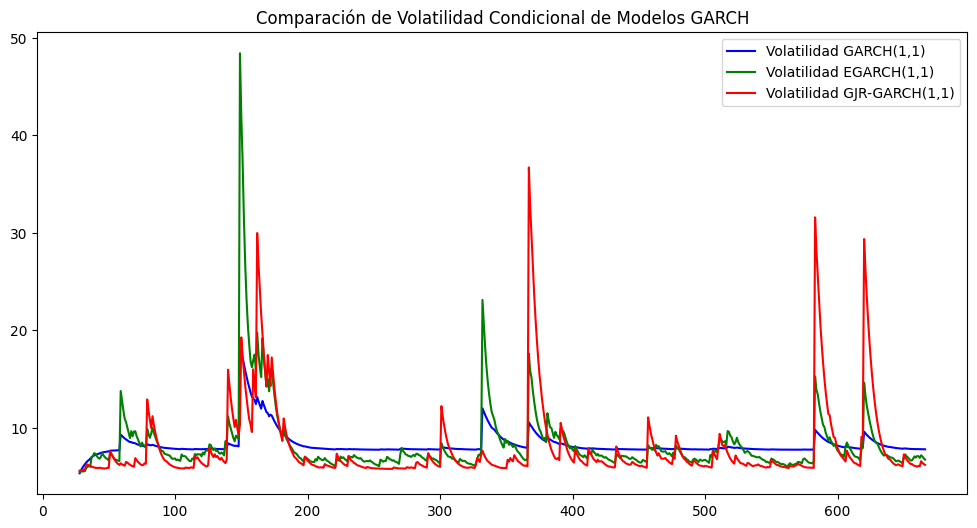

In [38]:
# Importar la librería arch para usar arch_model
from arch import arch_model

# Ajustar los modelos con optimizador 'bfgs' en lugar de 'maxiter'
def fit_models_and_compare(returns_data):
    model_results = {}
    metrics = {}

    # Ajustar el modelo GARCH(1, 1) - GARCH
    garch_model = arch_model(returns_data['Returns'], vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')
    model_results['GARCH(1,1)'] = garch_result
    metrics['GARCH(1,1)'] = {
        'AIC': garch_result.aic,
        'BIC': garch_result.bic,
        'Log-Likelihood': garch_result.loglikelihood
    }

    # Ajustar el modelo EGARCH(1, 1)
    egarch_model = arch_model(returns_data['Returns'], vol='EGARCH', p=1, q=1)
    egarch_result = egarch_model.fit(disp='off')
    model_results['EGARCH(1,1)'] = egarch_result
    metrics['EGARCH(1,1)'] = {
        'AIC': egarch_result.aic,
        'BIC': egarch_result.bic,
        'Log-Likelihood': egarch_result.loglikelihood
    }

    # Ajustar el modelo GJR-GARCH(1, 1)
    gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=1, q=1, o=1)
    gjr_garch_result = gjr_garch_model.fit(disp='off')
    model_results['GJR-GARCH(1,1)'] = gjr_garch_result
    metrics['GJR-GARCH(1,1)'] = {
        'AIC': gjr_garch_result.aic,
        'BIC': gjr_garch_result.bic,
        'Log-Likelihood': gjr_garch_result.loglikelihood
    }

    return model_results, metrics

# Ajustar los modelos y obtener las métricas
model_results, metrics = fit_models_and_compare(returns_data)

# Mostrar las métricas para cada modelo
metrics_df = pd.DataFrame(metrics).T
metrics_df.sort_values(by='AIC', ascending=True)  # Ordenar por AIC para ver el mejor modelo
metrics_df

# Graficar la volatilidad condicional de cada modelo
plt.figure(figsize=(12, 6))

# Graficar GARCH(1,1) - Volatilidad condicional
plt.plot(model_results['GARCH(1,1)'].conditional_volatility, label="Volatilidad GARCH(1,1)", color='blue')

# Graficar EGARCH(1,1) - Volatilidad condicional
plt.plot(model_results['EGARCH(1,1)'].conditional_volatility, label="Volatilidad EGARCH(1,1)", color='green')

# Graficar GJR-GARCH(1,1) - Volatilidad condicional
plt.plot(model_results['GJR-GARCH(1,1)'].conditional_volatility, label="Volatilidad GJR-GARCH(1,1)", color='red')

plt.title("Comparación de Volatilidad Condicional de Modelos GARCH")
plt.legend()
plt.show()


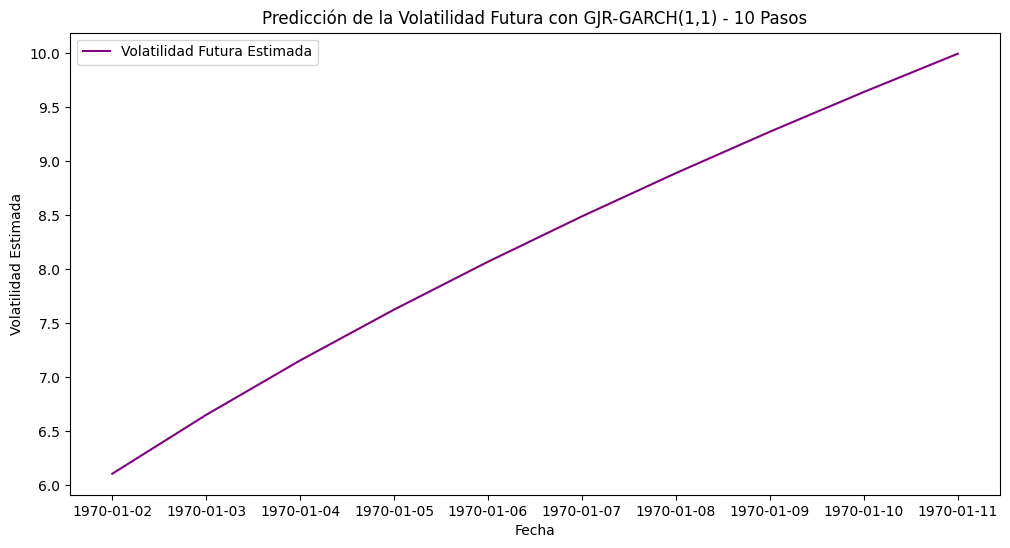

In [39]:
# Ajustar el modelo GJR-GARCH(1, 1) y realizar predicciones futuras
gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=1, q=1, o=1)
gjr_garch_result = gjr_garch_model.fit(disp='off')

# Realizar las predicciones de volatilidad futura (por ejemplo, 10 pasos)
forecast = gjr_garch_result.forecast(horizon=10)

# Obtener la volatilidad condicional pronosticada
forecasted_volatility = np.sqrt(forecast.variance.values[-1, :])  # La volatilidad es la raíz cuadrada de la varianza

# Crear un índice de fechas futuras para la predicción
forecast_dates = pd.date_range(start=returns_data.index[-1], periods=11, freq='D')[1:]

# Graficar la volatilidad condicional pronosticada
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecasted_volatility, label="Volatilidad Futura Estimada", color='purple')
plt.title("Predicción de la Volatilidad Futura con GJR-GARCH(1,1) - 10 Pasos")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad Estimada")
plt.legend()
plt.show()


AIC: 4381.481714688211
BIC: 4403.726161658945
Log-Likelihood: -2185.7408573441053


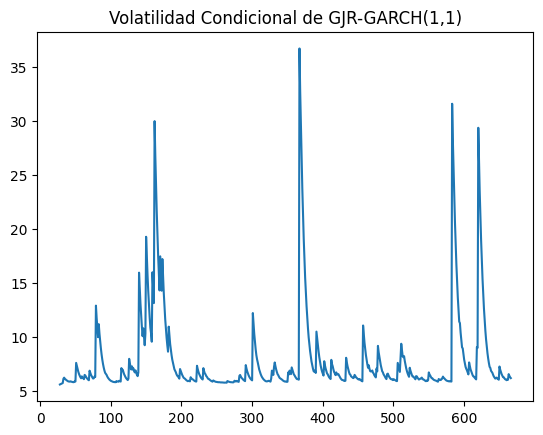

In [40]:
# Ajustar el modelo GJR-GARCH(1,1)
from arch import arch_model

gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=1, q=1, o=1)
gjr_garch_result = gjr_garch_model.fit(disp='off')

# Ver los resultados
print("AIC:", gjr_garch_result.aic)
print("BIC:", gjr_garch_result.bic)
print("Log-Likelihood:", gjr_garch_result.loglikelihood)

# Graficar la volatilidad condicional estimada
plt.plot(gjr_garch_result.conditional_volatility)
plt.title('Volatilidad Condicional de GJR-GARCH(1,1)')
plt.show()


In [41]:
# Importar la librería arch para usar arch_model
from arch import arch_model
import numpy as np
import pandas as pd

# Definir función para encontrar el mejor modelo GJR-GARCH
def optimize_gjr_garch(returns_data, max_p=5, max_q=5, max_o=2):
    best_aic = float('inf')
    best_bic = float('inf')
    best_model = None
    best_p, best_q, best_o = None, None, None

    # Probar diferentes combinaciones de p, q y o
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            for o in range(0, max_o + 1):
                try:
                    # Ajustar el modelo GJR-GARCH con los parámetros p, q, o
                    gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=p, q=q, o=o)
                    gjr_garch_result = gjr_garch_model.fit(disp='off')

                    # Comparar AIC y BIC
                    if gjr_garch_result.aic < best_aic:
                        best_aic = gjr_garch_result.aic
                        best_bic = gjr_garch_result.bic
                        best_model = gjr_garch_result
                        best_p, best_q, best_o = p, q, o
                except:
                    continue  # Si el modelo no converge, continuar con la siguiente combinación

    return best_model, best_p, best_q, best_o, best_aic, best_bic

# Llamar la función para optimizar el modelo GJR-GARCH
best_model, best_p, best_q, best_o, best_aic, best_bic = optimize_gjr_garch(returns_data)

# Mostrar los mejores parámetros y los resultados
print(f"Mejor modelo GJR-GARCH: p={best_p}, q={best_q}, o={best_o}")
print(f"AIC: {best_aic}")
print(f"BIC: {best_bic}")
print(f"Log-Likelihood: {best_model.loglikelihood}")


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Mejor modelo GJR-GARCH: p=4, q=5, o=0
AIC: 4247.4167223031445
BIC: 4296.35450563876
Log-Likelihood: -2112.7083611515723


AIC: 4247.4167223031445
BIC: 4296.35450563876
Log-Likelihood: -2112.7083611515723


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


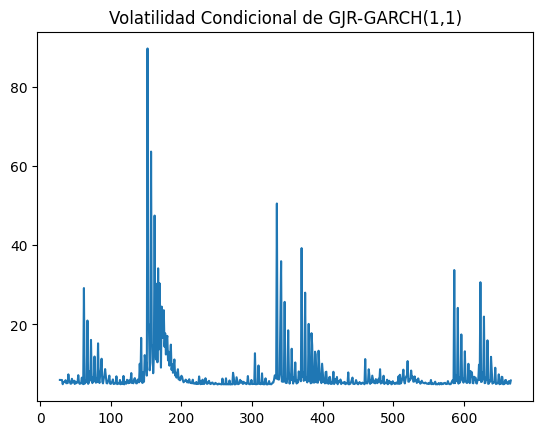

In [42]:
# Ajustar el modelo GJR-GARCH(1,1)
from arch import arch_model

gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=4, q=5, o=0)
gjr_garch_result = gjr_garch_model.fit(disp='off')

# Ver los resultados
print("AIC:", gjr_garch_result.aic)
print("BIC:", gjr_garch_result.bic)
print("Log-Likelihood:", gjr_garch_result.loglikelihood)

# Graficar la volatilidad condicional estimada
plt.plot(gjr_garch_result.conditional_volatility)
plt.title('Volatilidad Condicional de GJR-GARCH(1,1)')
plt.show()


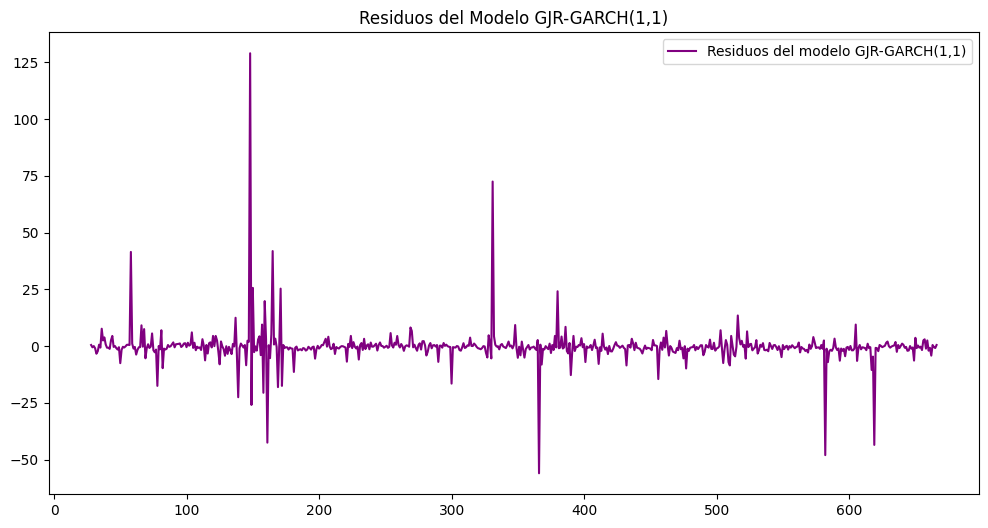

Prueba de autocorrelación de los residuos (Ljung-Box):
      lb_stat  lb_pvalue
1    7.040025   0.007971
2   12.400169   0.002029
3   12.400698   0.006129
4   15.116295   0.004466
5   15.118822   0.009867
6   16.575083   0.010979
7   16.649843   0.019799
8   16.761704   0.032688
9   16.776901   0.052326
10  22.797513   0.011519


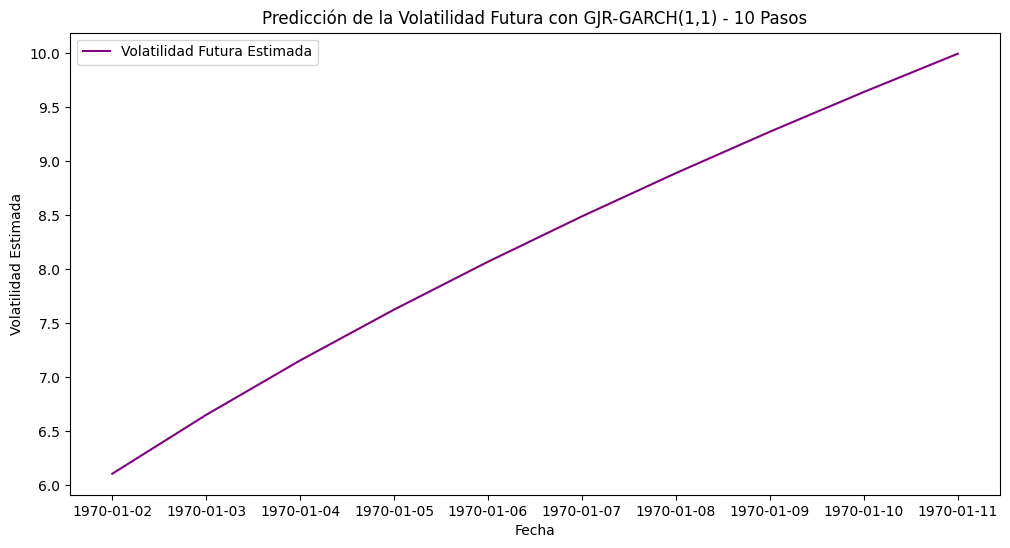

In [43]:
# 1. Análisis de residuos
residuals = model_results['GJR-GARCH(1,1)'].resid

# Graficar los residuos del modelo
plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuos del modelo GJR-GARCH(1,1)", color='purple')
plt.title("Residuos del Modelo GJR-GARCH(1,1)")
plt.legend()
plt.show()

# Realizar la prueba de autocorrelación de los residuos (Ljung-Box)
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=10, return_df=True)

# Mostrar el resultado de la prueba de autocorrelación de los residuos
print("Prueba de autocorrelación de los residuos (Ljung-Box):")
print(ljung_box_result)

# 2. Predicciones de volatilidad futura
# Realizar las predicciones de volatilidad futura (por ejemplo, 10 pasos)
forecast = model_results['GJR-GARCH(1,1)'].forecast(horizon=10)

# Obtener la volatilidad condicional pronosticada
forecasted_volatility = np.sqrt(forecast.variance.values[-1, :])  # La volatilidad es la raíz cuadrada de la varianza

# Crear un índice de fechas futuras para la predicción
forecast_dates = pd.date_range(start=returns_data.index[-1], periods=11, freq='D')[1:]

# Graficar la volatilidad condicional pronosticada
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, forecasted_volatility, label="Volatilidad Futura Estimada", color='purple')
plt.title("Predicción de la Volatilidad Futura con GJR-GARCH(1,1) - 10 Pasos")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad Estimada")
plt.legend()
plt.show()


In [44]:
# Importar la librería necesaria
from arch import arch_model

# Función para encontrar la mejor combinación de p, q y o
def optimize_gjr_garch(returns_data, max_p=5, max_q=5, max_o=2):
    best_aic = float('inf')
    best_bic = float('inf')
    best_model = None
    best_p, best_q, best_o = None, None, None

    # Probar diferentes combinaciones de p, q y o
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            for o in range(0, max_o + 1):
                try:
                    # Ajustar el modelo GJR-GARCH con los parámetros p, q, o
                    gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=p, q=q, o=o)
                    gjr_garch_result = gjr_garch_model.fit(disp='off')

                    # Comparar AIC y BIC
                    if gjr_garch_result.aic < best_aic:
                        best_aic = gjr_garch_result.aic
                        best_bic = gjr_garch_result.bic
                        best_model = gjr_garch_result
                        best_p, best_q, best_o = p, q, o
                except:
                    continue  # Si el modelo no converge, continuar con la siguiente combinación

    return best_model, best_p, best_q, best_o, best_aic, best_bic

# Llamar la función para optimizar el modelo GJR-GARCH
best_model, best_p, best_q, best_o, best_aic, best_bic = optimize_gjr_garch(returns_data)

# Mostrar los mejores parámetros y los resultados
print(f"Mejor modelo GJR-GARCH: p={best_p}, q={best_q}, o={best_o}")
print(f"AIC: {best_aic}")
print(f"BIC: {best_bic}")
print(f"Log-Likelihood: {best_model.loglikelihood}")


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Mejor modelo GJR-GARCH: p=4, q=5, o=0
AIC: 4247.4167223031445
BIC: 4296.35450563876
Log-Likelihood: -2112.7083611515723


In [47]:
# Ajustar los modelos y obtener los resúmenes
def fit_models(returns_data):
    model_results = {}

    # Ajustar el modelo GARCH(1, 1) - GARCH
    garch_model = arch_model(returns_data['Returns'], vol='Garch', p=5, q=1)
    garch_result = garch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['GARCH(1,1)'] = garch_result

    # Ajustar el modelo EGARCH(1, 1)
    egarch_model = arch_model(returns_data['Returns'], vol='EGARCH', p=5, q=1)
    egarch_result = egarch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['EGARCH(1,1)'] = egarch_result

    # Ajustar el modelo GJR-GARCH(1, 1)
    gjr_garch_model = arch_model(returns_data['Returns'], vol='GARCH', p=4, q=5, o=0)
    gjr_garch_result = gjr_garch_model.fit(disp='off')  # No usar optimizer ni method
    model_results['GJR-GARCH(1,1)'] = gjr_garch_result

    return model_results

# Ajustar los modelos y obtener los resúmenes
model_results = fit_models(returns_data)

# Comparar AIC, BIC y Log-Likelihood de cada modelo
model_comparisons = {
    'GARCH(1,1)': {
        'AIC': model_results['GARCH(1,1)'].aic,
        'BIC': model_results['GARCH(1,1)'].bic,
        'Log-Likelihood': model_results['GARCH(1,1)'].loglikelihood,
    },
    'EGARCH(1,1)': {
        'AIC': model_results['EGARCH(1,1)'].aic,
        'BIC': model_results['EGARCH(1,1)'].bic,
        'Log-Likelihood': model_results['EGARCH(1,1)'].loglikelihood,
    },
    'GJR-GARCH(1,1)': {
        'AIC': model_results['GJR-GARCH(1,1)'].aic,
        'BIC': model_results['GJR-GARCH(1,1)'].bic,
        'Log-Likelihood': model_results['GJR-GARCH(1,1)'].loglikelihood,
    }
}

# Mostrar las comparaciones
for model, metrics in model_comparisons.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("=" * 80)

GARCH(1,1):
  AIC: 4457.472449207003
  BIC: 4493.063564360177
  Log-Likelihood: -2220.7362246035013
EGARCH(1,1):
  AIC: 4142.650662540951
  BIC: 4178.241777694126
  Log-Likelihood: -2063.3253312704755
GJR-GARCH(1,1):
  AIC: 4247.4167223031445
  BIC: 4296.35450563876
  Log-Likelihood: -2112.7083611515723


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [46]:
# Importar la librería necesaria
from arch import arch_model

# Función para encontrar la mejor combinación de p y q para el modelo EGARCH
def optimize_egarch(returns_data, max_p=5, max_q=5):
    best_aic = float('inf')
    best_bic = float('inf')
    best_model = None
    best_p, best_q = None, None

    # Probar diferentes combinaciones de p y q
    for p in range(1, max_p + 1):
        for q in range(1, max_q + 1):
            try:
                # Ajustar el modelo EGARCH con los parámetros p y q
                egarch_model = arch_model(returns_data['Returns'], vol='EGARCH', p=p, q=q)
                egarch_result = egarch_model.fit(disp='off')

                # Comparar AIC y BIC
                if egarch_result.aic < best_aic:
                    best_aic = egarch_result.aic
                    best_bic = egarch_result.bic
                    best_model = egarch_result
                    best_p, best_q = p, q
            except:
                continue  # Si el modelo no converge, continuar con la siguiente combinación

    return best_model, best_p, best_q, best_aic, best_bic

# Llamar la función para optimizar el modelo EGARCH
best_model, best_p, best_q, best_aic, best_bic = optimize_egarch(returns_data)

# Mostrar los mejores parámetros y los resultados
print(f"Mejor modelo EGARCH: p={best_p}, q={best_q}")
print(f"AIC: {best_aic}")
print(f"BIC: {best_bic}")
print(f"Log-Likelihood: {best_model.loglikelihood}")


Mejor modelo EGARCH: p=5, q=1
AIC: 4142.650662540951
BIC: 4178.241777694126
Log-Likelihood: -2063.3253312704755


Mejor modelo EGARCH(5,1):
AIC: 4142.650662540951
BIC: 4178.241777694126
Log-Likelihood: -2063.3253312704755


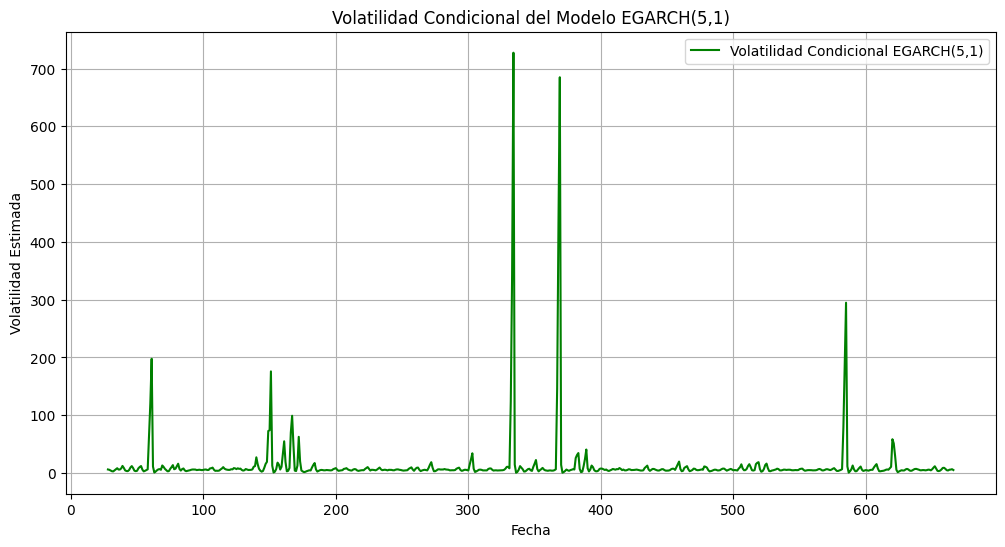

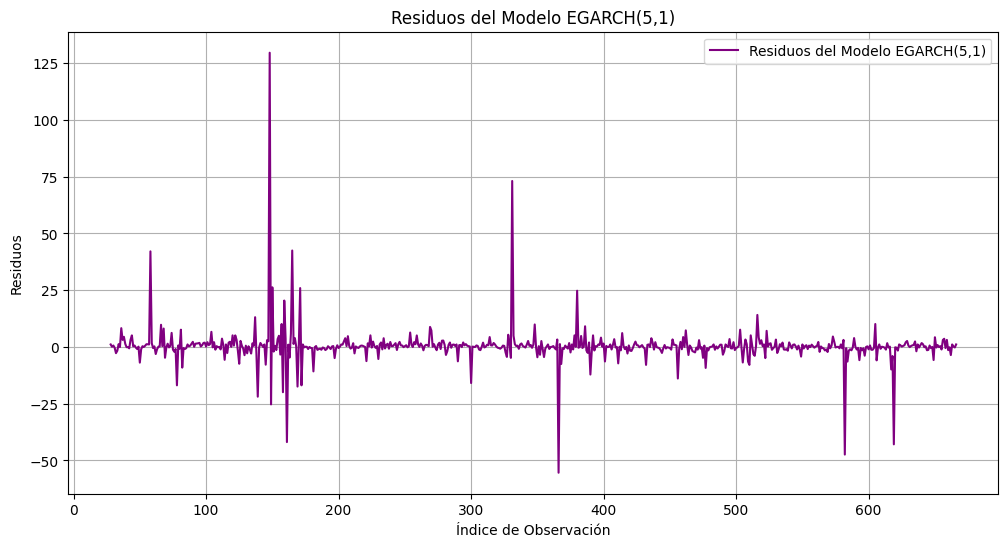

In [48]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
from arch import arch_model

# Asumiendo que 'returns_data' es tu DataFrame con los rendimientos
# Ajustamos el modelo EGARCH(5,1) - el mejor modelo
egarch_model = arch_model(returns_data['Returns'], vol='EGARCH', p=5, q=1)
egarch_result = egarch_model.fit(disp='off')

# Resumen de las métricas
aic = egarch_result.aic
bic = egarch_result.bic
log_likelihood = egarch_result.loglikelihood

# Imprimir el resumen para la sección de resultados
print(f"Mejor modelo EGARCH(5,1):")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"Log-Likelihood: {log_likelihood}")

# Graficar la volatilidad condicional del modelo EGARCH(5,1)
plt.figure(figsize=(12, 6))
plt.plot(egarch_result.conditional_volatility, label="Volatilidad Condicional EGARCH(5,1)", color='green')
plt.title("Volatilidad Condicional del Modelo EGARCH(5,1)")
plt.xlabel("Fecha")
plt.ylabel("Volatilidad Estimada")
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de los residuos del modelo EGARCH(5,1)
residuals = egarch_result.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuos del Modelo EGARCH(5,1)", color='purple')
plt.title("Residuos del Modelo EGARCH(5,1)")
plt.xlabel("Índice de Observación")
plt.ylabel("Residuos")
plt.legend()
plt.grid(True)
plt.show()

# Si lo deseas, también puedes realizar una prueba de autocorrelación de los residuos (Ljung-Box)
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=10, return_df=True)

# Mostrar el resultado de la prueba de autocorrelación


In [52]:
import pandas as pd

# Asegúrate de que 'best_model' contiene el modelo ajustado correctamente
results_summary = {
    "Dep. Variable": ["Returns"],
    "Model": ["EGARCH(5,1)"],
    "Log Likelihood": [best_model.loglikelihood],
    "Date": [pd.to_datetime('today').strftime('%a, %d %b %Y')],
    "AIC": [best_aic],
    "BIC": [best_bic],
    "Sample": ["0 - " + str(len(returns_data))],
    "Covariance Type": ["robust"],
}

# Resumen de los coeficientes
coef_summary = {
    "coef": best_model.params,
    "std err": best_model.std_err,
    "z": best_model.tvalues,
    "P>|z|": best_model.pvalues,
}

# Extraer los intervalos de confianza para los coeficientes (conf_int devuelve un DataFrame)
conf_int = best_model.conf_int()

# Asegúrate de que los intervalos de confianza se agreguen correctamente:
coef_summary["[0.025]"] = conf_int.iloc[:, 0]  # Intervalo inferior (0.025)
coef_summary["[0.975]"] = conf_int.iloc[:, 1]  # Intervalo superior (0.975)

# Convertir los resúmenes a DataFrame para la visualización
summary_df = pd.DataFrame(results_summary)
coef_df = pd.DataFrame(coef_summary)

# Mostrar las tablas de resultados
print("EGARCH(5,1) Results Summary")
print(summary_df)

print("\nEGARCH(5,1) Coefficients:")
print(coef_df)

# Exportar las tablas a formato LaTeX o CSV si lo deseas
# summary_df.to_latex("egarch_results_summary.tex")
# coef_df.to_latex("egarch_coefficients.tex")



EGARCH(5,1) Results Summary
  Dep. Variable        Model  Log Likelihood              Date          AIC  \
0       Returns  EGARCH(5,1)    -2063.325331  Fri, 21 Mar 2025  4142.650663   

           BIC   Sample Covariance Type  
0  4178.241778  0 - 632          robust  

EGARCH(5,1) Coefficients:
              coef   std err           z         P>|z|   [0.025]   [0.975]
mu       -1.111111  0.002061 -539.109194  0.000000e+00 -1.115151 -1.107072
omega     1.484474  0.498673    2.976846  2.912305e-03  0.507092  2.461856
alpha[1]  0.710326  0.199693    3.557092  3.749826e-04  0.318935  1.101717
alpha[2]  0.510462  0.241688    2.112074  3.468013e-02  0.036763  0.984161
alpha[3]  0.525938  0.186699    2.817034  4.846942e-03  0.160014  0.891861
alpha[4] -0.443042  0.255205   -1.736026  8.255921e-02 -0.943235  0.057150
alpha[5] -0.721163  0.234865   -3.070544  2.136689e-03 -1.181490 -0.260836
beta[1]   0.655895  0.116953    5.608174  2.044722e-08  0.426671  0.885119
